# Transient Water Release and Imbibitions Method Data (TRIM) Processing Tool

In [1]:
import numpy as np

In [3]:
#Defining functions needed of data processing.

def sample_pts2(points, max_time_step, max_points):

    """This function samples points form the outflow data. 
    It samples less points where the plot of the data is flat and more points where the 
    plot of the data is curved. Points are selected based on a time step and a mass step."""
    
    # Prealocating list to store data selected data points in.
    chosen_pts = []

    # Specifying the starting place for point to point comparison (point 'a' to point 'b').
    # Also adding the first point (point a) to the prealocated list 'chosen'.
    a = np.min(points)
    b = a + 1
    chosen_pts.append(a)
    
    # Creates short-hand variables for a shorter code. The lond had names are used in the definition line to provide more clear explanation.
    mx_ts = max_time_step
    mx_ps = max_points

    # Finds the max and minimum in the list of points.
    top = np.max(points)
    bottom = np.min(points)

    # For loop to exicute point to point comparison while changing the step distances to accomodate for curviture of the plot and sampling rates of the data.
    for count in range(len(points)):
        if (df.Delta_sec[b] - df.Delta_sec[a]) <= mx_ts or (df['Mass (g)'][b] - df['Mass (g)'][a]) < (df['Mass (g)'][top] - df['Mass (g)'][bottom]) / mx_ps:
            b = b + 1   # Increases the step by an incrament of 1 (one) to when the time step or mass step are smaller than desired.
        else:
            chosen_pts.append(b)   # Collects the desired points.
            a = b              # Resetting the first point of comparison to the previously found desired point.
            b = b + 1          # Stepping forwar one point to initiate the process of selecting the next desired point.
    
    # Returning a dataframe of the selected points.
    return(pd.DataFrame({'chosen_pts': chosen_pts}))

# Phase I: Experimental setup.

In [2]:
# Allows the user to select which TRIM cell will be used.
Cell = input("Specify which cell you will be using; spell in all lower case letters, (e.g., small or large):")

# Sellects the approprate sell dimentions based on the sell name: small or large.
if Cell == 'small':
    D_cell = 6.175   # [cm]
    H_cell = 6.597   # [cm]
else:
    D_cell = 25.50   # [cm]
    H_cell = 17.80   # [cm]

# Calcualtes the cross section area of the flow cell (A_cell in cm^2).
A_cell = np.pi * D_cell **2 /4   # [cm^2]    

#........................................................................................................................

# User Input Sample Information: 
## mass of dry solids (Ms in gr.), 
## specific gravity of solids (Gs), and 
## target dry density of sample (rho_d in gr./cm^3). 
Ms = float(input("Insert the mass of dry solids in gr. (e.g., 170.00):"))
Gs = float(input("Insert the specific gravity of solids (e.g., 2.70):"))
rho_dry = float(input("Insert the target dry density of the sample in gr./cm^3 (e.g., 1.695):"))

# Calcualting the desing height (H in cm) required to meet target dry density.
H = Ms / rho_dry / A_cell   # [cm]
H_from_top = H_cell - H     # [cm]

# Brief report of sample design information; gives the user an oportunity to construct the sampel before moving to the next step.
print("\nCompact the", Ms, "gr. of dry meaterial to a hieght of", round(H,2), 
      "[cm] (i.e.", round(H_from_top,2), "cm from the top of the acrylic housing).")
print("\nAfter compaction, take three depth measurements between the top of the acrylic housing and the sample surface; measure in cm. Those measurements will be used to",
      "calculate the actual sample dry density gr./cm^3, porosity, and the mass of water required to saturate the sample gr. \n")
Next_step = input("When you have your depth measurements ready, press Enter:")   # Gives the user control over progression to the next step.

# User input: three measurements of the depth to the sample surface (Dpth# in cm).
print("\nInsert the three sample height measurements in cm.")
Dpth1 = float(input("Actual depth #1 (e.g., 3.26):"))   # [cm]
Dpth2 = float(input("Actual depth #2 (e.g., 3.24):"))   # [cm]
Dpth3 = float(input("Actual depth #3 (e.g., 3.25):"))   # [cm]

# Calcualtes the average sample height in cm.
H_avg = H_cell - np.average([Dpth1, Dpth2, Dpth3])   # [cm]

# Defining the density of water at 20C.
rho_w = 0.9982   # [gr./cm^3]

# Calculates the porosity of the sample (n) and the mass of water required to saturate the sample (Mw in gr.) based on the average measured sample hieght.
n = 1 - (Ms / (Gs * H_avg * A_cell))    # [no units]
Mw = H_avg * A_cell * rho_w - Ms / Gs   # [gr.]

#........................................................................................................................

# Creating and reporting imortant sampe desing information to a .txt file for convienient storage.
fh = open("Sample_Design.txt", "w")
fh.writelines(["Summary of Experimental Setup \n TRIM cell info... \n \t Cell type = ", Cell, "\n \t Diameter = ", str(D_cell), " [cm] \n \t Height = ", str(H_cell), " [cm]",
               "\n Soil sample info... \n \t Total Dry Mass (Ms) = ", str(Ms), " [gr.] \n \t Specific Gravity (Gs) = ", str(round(Gs,2)), " [gr./gr.] \n \t Height (H) = ", 
               str(round(H_avg,2)), " [cm] \n \t Dry Density (rho) = ", str(round(rho_dry,2)), " [gr./cm^3] \n \t Porosity (n) = ", str(round(n,3)), 
               "\n \t Mass of H2O to Saturate (Mw) = ", str(round(Mw,2)), " [gr.]"])
fh.close()

# Giving an in-Python display of what was exported to the .txt file.
print("\nThe following is a summary of experimental setup information. It was transfered to the Sample_Design.txt file. \n \n Summary of Experimental Setup", 
      "\n TRIM cell info... \n \t Cell type = ", Cell, "\n \t Diameter =", D_cell, "[cm] \n \t Height =", H_cell, "[cm] \n Soil sample info... \n \t", 
      "Total Dry Mass (Ms) =", Ms, "[gr.] \n \t Specific Gravity (Gs) =", round(Gs,2), "[gr./gr.] \n \t Height (H) =", round(H_avg,2), 
      "[cm] \n \t Dry Density (rho_dry) =", round(rho_dry,2), "[gr./cm^3] \n \t Porosity (n) =", round(n,3), "\n \t Mass of H2O to Saturate (Mw) =", round(Mw,2), "[gr.]")

Specify which cell you will be using; spell in all lower case letters, (e.g., small or large): small
Insert the mass of dry solids in gr. (e.g., 170.00): 170.00
Insert the specific gravity of solids (e.g., 2.70): 2.70
Insert the target dry density of the sample in gr./cm^3 (e.g., 1.695): 1.695



Compact the 170.0 gr. of dry meaterial to a hieght of 3.35 [cm] (i.e. 3.25 cm from the top of the acrylic housing).

After compaction, take three depth measurements between the top of the acrylic housing and the sample surface; measure in cm. Those measurements will be used to calculate the actual sample dry density gr./cm^3, porosity, and the mass of water required to saturate the sample gr. 



When you have your depth measurements ready, press Enter: 



Insert the three sample height measurements in cm.


Actual depth #1 (e.g., 3.26): 3.26
Actual depth #2 (e.g., 3.24): 3.24
Actual depth #3 (e.g., 3.25): 3.25



The following is a summary of experimental setup information. It was transfered to the Sample_Design.txt file. 
 
 Summary of Experimental Setup 
 TRIM cell info... 
 	 Cell type =  small 
 	 Diameter = 6.175 [cm] 
 	 Height = 6.597 [cm] 
 Soil sample info... 
 	 Total Dry Mass (Ms) = 170.0 [gr.] 
 	 Specific Gravity (Gs) = 2.7 [gr./gr.] 
 	 Height (H) = 3.35 [cm] 
 	 Dry Density (rho_dry) = 1.7 [gr./cm^3] 
 	 Porosity (n) = 0.372 
 	 Mass of H2O to Saturate (Mw) = 37.09 [gr.]


# Phase II: Processing raw TRIM data; preparation of inputs for Hydrus ID model use.

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
#Defining functions needed of data processing.

def sample_pts2(points, max_time_step, max_points):

    """This function samples points form the outflow data. 
    It samples less points where the plot of the data is flat and more points where the 
    plot of the data is curved. Points are selected based on a time step and a mass step."""
    
    # Prealocating list to store data selected data points in.
    chosen_pts = []

    # Specifying the starting place for point to point comparison (point 'a' to point 'b').
    # Also adding the first point (point a) to the prealocated list 'chosen'.
    a = np.min(points)
    b = a + 1
    chosen_pts.append(a)
    
    # Creates short-hand variables for a shorter code. The lond had names are used in the definition line to provide more clear explanation.
    mx_ts = max_time_step
    mx_ps = max_points

    # Finds the max and minimum in the list of points.
    top = np.max(points)
    bottom = np.min(points)

    # For loop to exicute point to point comparison while changing the step distances to accomodate for curviture of the plot and sampling rates of the data.
    for count in range(len(points)):
        if (df.Delta_sec[b] - df.Delta_sec[a]) <= mx_ts or (df['Mass (g)'][b] - df['Mass (g)'][a]) < (df['Mass (g)'][top] - df['Mass (g)'][bottom]) / mx_ps:
            b = b + 1   # Increases the step by an incrament of 1 (one) to when the time step or mass step are smaller than desired.
        else:
            chosen_pts.append(b)   # Collects the desired points.
            a = b              # Resetting the first point of comparison to the previously found desired point.
            b = b + 1          # Stepping forwar one point to initiate the process of selecting the next desired point.
    
    # Returning a dataframe of the selected points.
    return(pd.DataFrame({'chosen_pts': chosen_pts}))

Please specify the path to csv file of raw TRIM data which you wish to process; note that the name you enter must contain .csv at the end (e.g., Valley_Sub_raw.csv): Valley_Sub_raw.csv
Input the amount of air measured in the bubble trap, in mL (e.g., 11.0): 11


The rate of diffused air is: 0.45 gr./gr.


Input the mass of water imbibed into the sampe, in gr. (e.g., 37.00): 37


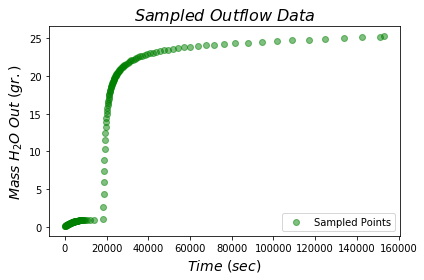

Figure 1: plot of sampled outflow data; data are corrected for diffused air, evaporation, and saturation error

The sampled outflow data in Figure 1 were exported to the csv file: TRIM_input.csv


In [11]:
### Reading raw evaporation data.
fh_raw = input("Please specify the path to csv file of raw TRIM data which you wish to process; note that the name you enter must contain .csv at the end (e.g., Valley_Sub_raw.csv):")
df = pd.read_csv((str(fh_raw)), sep = '\t')
#df = pd.read_csv("AGRON 935\Valley_Sub_raw.csv", sep = "\t")

#........................................................................................................................

# Defining the dataframe of interest to be used for calculaitng the evaporation rate.

## Excludes the NAN's at the very end of the dataframe.
start = 0
end = len(df)-1    
df = df[start:end]

## Giving a meaningful names to a column of data.
df['Mass'] = df['Unnamed: 3']
df['Uair (kPa)'] = df['Step']
df['Step'] = df['Time']
df['Time'] = df['Unnamed: 1']
df = df.drop(columns=['Unnamed: 1','Unnamed: 3','Unnamed: 5','Notes'])

## Converting time from [[YYYY/MM/DD], [HH:MM AM/PM]] to [sec] for calculations and plotting.
df['Datetime'] = pd.to_datetime(df.Date + " " + df.Time)                  # from [[MM/DD/YYYY], [HH:MM, AM/PM]] to [YYYY/MM/DD, HH:MM:SS].
df['Time_diff']= df.Datetime - df.Datetime[start]                         # from [YYYY/MM/DD, HH:MM:SS] to [days, HH:MM:SS].
df['Delta_sec']= df.Time_diff.dt.days * 86400 + df.Time_diff.dt.seconds   # from [days, HH:MM:SS] to [sec].

#........................................................................................................................

# Sort data based on step type: 'Before Test', 'small increment', and 'Large increment'.

## Removing 'Before Test' data.
idx = df.Step != "Before Test"      # Identifies the rows to keep: 'small' and 'Large increments' which are not 'Before Test'.
df = df[idx]                        # Applies the index to the dataframe removing the 'Before Test' data.
df = df.reset_index(0)              # Resets the index to zero.
df = df.drop(columns = ['index'])   # Drops the old index column.

## Preallocate lists to store appropriate index values.
sm_inc_idx = []
lg_inc_idx = []

## Using a for loop to sort index values based on step: 'samll increment' and 'Large increment'.
for index in range(len(df.Step)):    
    if df.Step[index] == "small increment":
        sm_inc_idx.append(index)
    else:
        lg_inc_idx.append(index)

#........................................................................................................................

# Calculating the rate of diffused air, and correcting the large increment data for diffused air.

## User input Bubble Trap measurement, in mL.
bub_trap = float(input("Input the amount of air measured in the bubble trap, in mL (e.g., 11.0):"))   # [mL]

## Calculate the mass of water released during the Large increment, in grams. 
H2O_lg_inc = df.Mass[np.max(lg_inc_idx)] - df.Mass[np.min(lg_inc_idx)]   # [gr.]

## Calculate the rate of diffused air during the Large increment.
rt_diff_air = bub_trap / H2O_lg_inc   # [ml H2O displaced / grams large increment H2O outflow] = [gr./gr.], when rho_H2O=1.0 gr/ml
print("The rate of diffused air is:", round(rt_diff_air,2), "gr./gr.")

## Create an array of large increment mass values for element-wise corrections.
lg_inc_array = np.array(df.Mass)

## Prealocate a temporary list to store corrected mass values.
Corrected_masses = []

## Using a for loop for elementwise correction of the large increment; the for loop is indexed to apply the correction to the large increment data only.
## Equation: Correct_Mass1[gr.] = Mass1[gr.] - (Mass1[gr.] - Mass0[gr.]) * Rate_diff_air[ml/gr.]
for index in range(np.min(lg_inc_idx),np.max(lg_inc_idx)):
    new_mass = lg_inc_array[index] - (lg_inc_array[index] - lg_inc_array[index-1]) * rt_diff_air
    Corrected_masses.append([new_mass])

#........................................................................................................................

# Replacing the old large increment masses with those corrected for diffused air.

## Create a second dataframe of corrected large increment masses.
df2 = pd.DataFrame(Corrected_masses)
df2['Mass'] = df2                                   # [gr.]

## Using a for loop to replace the old large increment masses in the 
## original dataframe with the new/corrected masses in the second dataframe.
for index in range(np.min(lg_inc_idx), np.max(lg_inc_idx)):
    index2 = index - np.min(lg_inc_idx)
    old_mass = df.Mass[index]                       # [gr.]
    new_mass = df2.Mass[index2]                     # [gr.]
    df.Mass = df.Mass.replace(old_mass, new_mass)   # [gr.]

#........................................................................................................................   

# Correcting all mass measurements for evaportion and for oversaturation.

# Retrieving sample specifications from the sample design sheet: sample height (H_sample) [cm],
# sample diameter (D_sample) [cm], and porosity (n).

## Opening the text file.
fh_SD = open("Sample_Design.txt", "r")
fh_SD = fh_SD.read()

## Segragating the text into managable strings.
fh_SD = re.sub(' \t ', '', fh_SD)
fh_SD = fh_SD.split('\n')
fh_SD = pd.DataFrame(fh_SD)

##  Extracting the values of required_water [gr.].
required_water = fh_SD[0][11]; required_water = required_water.split(' '); required_water = float(required_water[7])

## User inputs the mass of water required to saturate the sample and the amount that was in the sample when the test was initiated.
#required_water = float(input("Input the mass of water required to saturate the sampe, in gr.:"))   # [gr.]
imbibed_water = float(input("Input the mass of water imbibed into the sampe, in gr. (e.g., 37.00):"))            # [gr.]
print(" ") # Making some space for readability of printed information.

## Equaiton: Correct_Mass1[gr.] = Mass1[gr.] + Comulative_time[sec] * Evap_rate[gr./sec]
evap_rate = 0.0927/86400                                      # [gr./sec], Evaporation rate is constant.
excess_water = imbibed_water - required_water                 # [gr.]
df.Mass = df.Mass + df.Delta_sec * evap_rate - excess_water   # [gr.]

## Updataing the 'Mass (g)' column with the corrected 'Mass' values, and removing the rows with negative mass values.
df['Mass (g)'] = df.Mass
df = df.drop(columns = ['Mass'])
idx = df['Mass (g)'] > 0                                     # Developing a boolian index to excluded negative mass values.
df = df[idx]                                                 # selecting range of rows in the dataframe that have positive mass values.
df = df.reset_index(0)                                       # Resetting the index to start with zero.
df = df.drop(columns = ['index', 'Datetime', 'Time_diff'])   # Removing un-needed columns of transitional information.

#........................................................................................................................

# Redefine the 'small increment', and 'Large increment' indexes.

## Preallocate lists to store appropriate index values.
sm_inc_idx = []
lg_inc_idx = []

## Using a for loop to sort index values based on step: 'samll increment' and 'Large increment'.
for index in range(len(df.Step)):    
    if df.Step[index] == "small increment":
        sm_inc_idx.append(index)
    else:
        lg_inc_idx.append(index)
        
#........................................................................................................................

# Sampling data from the corrected TRIM data.

## Specifying the step size for time and mass.
mx_ts = 300   # Should not exceed the max sampling rate used to collect the TRIM experiment data, typically 300 seconds.
mx_ps = 100   # Should not be less than the minimum number of points recommended for inverse modeling procedures: 100 points, (Wayllace and Lu 2012).

## Exicuting the sampling function for the small and the large step incraments of the TRIM test individually, then combining the two dataframes into one.
chosen_sm = sample_pts2(range(np.min(sm_inc_idx),np.max(sm_inc_idx)),mx_ts,mx_ps)
chosen_lg = sample_pts2(range(np.min(lg_inc_idx),np.max(lg_inc_idx)),mx_ts,mx_ps)
df3 = chosen_sm.append(chosen_lg)

## Optimizing the step size to meet or slightly exceed the minium number of points for modeling. The minimum number of point required is 100.
while len(df3) < 150:
    
    df3 = []   # Emptying the dataframe
    
    ## Adjusting the step sizes
    mx_ts = mx_ts - 25
    mx_ps = mx_ps + 25
    
    ## Re-exicuting the sampling fucntion with the adjusted step sizes and merging the two dataframes into one.
    chosen_sm = sample_pts2(range(np.min(sm_inc_idx),np.max(sm_inc_idx)),mx_ts,mx_ps)
    chosen_lg = sample_pts2(range(np.min(lg_inc_idx),np.max(lg_inc_idx)),mx_ts,mx_ps)
    df3 = chosen_sm.append(chosen_lg)

#........................................................................................................................ 

# Plotting the selected points to show the sampled data.
plt.scatter(df.Delta_sec.reindex(df3.chosen_pts), df['Mass (g)'].reindex(df3.chosen_pts), alpha = 0.5, label="Sampled Points", color = "green")
plt.title("$Sampled\ Outflow\ Data$", fontsize = 16)
plt.ylabel("$Mass\ H_2O\ Out\ (gr.)$", fontsize = 14)
plt.xlabel("$Time\ (sec)$", fontsize = 14)
plt.legend(loc = 4) # Positions legend in the lower right corner.
plt.tight_layout()
plt.show()

## Plot caption...
print("Figure 1: plot of sampled outflow data; data are corrected for diffused air, evaporation, and saturation error.")

#........................................................................................................................ 

# Exporting the sampled points as .csv file: TRIM_input.csv.

## Create a dataframe to store all the information that are to be exported.
TRIM_input = pd.DataFrame()

## Add all the appropriate data to that dataframe: data are selected using the sampled points as an index 
## so that the corresponding data for each selected point is collected.
TRIM_input['Date'] = df.Date[df3.chosen_pts]                          # [MM/DD/YYYY]
TRIM_input['Time'] = df.Time[df3.chosen_pts]                          # [HH:MM:SS AM/PM]
TRIM_input['Step'] = df.Step[df3.chosen_pts]                          # [small increment or Large increment]
TRIM_input['Mass (g)'] = df['Mass (g)'].reindex(df3.chosen_pts)       # [gr.]
TRIM_input['Uair (kPa)'] = df['Uair (kPa)'].reindex(df3.chosen_pts)   # [kPa]

## Sets the 'Date' column as the dataframe index.
TRIM_input = TRIM_input.set_index('Date')

## Create a csv file for the dataframe to be passed to and stored in.
TRIM_input.to_csv("TRIM_input.csv", sep = "\t")

## Notify the user that the data has been exported to the csv file.
print("\nThe sampled outflow data in Figure 1 were exported to the csv file: TRIM_input.csv")

In [12]:
# Read the csv file to check for mistakes.
pd.read_csv("TRIM_input.csv", sep = "\t")

,Date,Time,Step,Mass (g),Uair (kPa)
0,7/24/2019,9:19:52 AM,small increment,0.090032,3.0
1,7/24/2019,9:22:02 AM,small increment,0.120172,4.0
2,7/24/2019,9:24:12 AM,small increment,0.140311,4.0
3,7/24/2019,9:26:23 AM,small increment,0.160452,4.0
4,7/24/2019,9:28:33 AM,small increment,0.190591,4.0
...,...,...,...,...,...
151,7/25/2019,8:01:28 PM,Large increment,24.934035,290.0
152,7/25/2019,10:31:31 PM,Large increment,25.023695,290.0
153,7/26/2019,12:51:34 AM,Large increment,25.112710,290.0
154,7/26/2019,3:16:37 AM,Large increment,25.207508,290.0


# Phase III: Plotting the objective function, SWCC, and HCF from Hydrus 1D output.

In [20]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

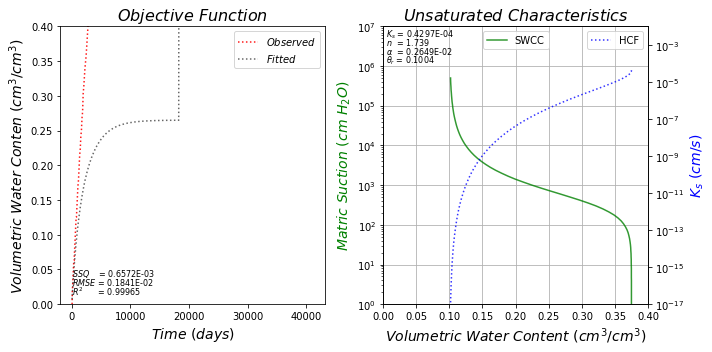


Figures 2 & 3: Objective Function and Unsaturated Characteristics


In [36]:
# Openging the data Hydrus 1D output file (Fit.out) and formating the informations to make it 
# readable and sepparable.

## Opening the .out file.
fh = open("VS, CA 1\Fit.out", "r")
fh = fh.read()

## Segragating the main text into idealized groups (strings) for easy access and minipulation.
fh = re.split("\n\n\n", fh)

#........................................................................................................................

# Handling of estimated parameters - sum of squared error (SSQ) and van Genuchten fitting parameters: 
# residual water content (WCR), air entry (ALPHA)[1/cm], pore size distribution coefficient (N),
# and saturated hydraulic conductiviyt (COND)[cm/s].

## Accessing the estimated parameters fromt the main text file.
fh_fit_params = fh[5]

## Formatting strings to be converted into a DataFrame.
fh_fit_params = re.split('\n', fh_fit_params)

for i in range(len(fh_fit_params)):        
    fh_fit_params[i] = re.sub('SSQ', '  SSQ', fh_fit_params[i])
    fh_fit_params[i] = re.sub('      ', ' ', fh_fit_params[i])
    fh_fit_params[i] = re.sub('     ', ' ', fh_fit_params[i])
    fh_fit_params[i] = re.sub('    ', '  ', fh_fit_params[i])
    fh_fit_params[i] = re.sub('D+','E', fh_fit_params[i])
    fh_fit_params[i] = re.sub('CONES ', 'K_sat', fh_fit_params[i])
    fh_fit_params[i] = re.split('  ', fh_fit_params[i])
        
## Putting data into a DataFrame: df_fit_params.
df_fit_params = pd.DataFrame(fh_fit_params)
df_fit_params = df_fit_params[4:]

## Establishing the column titles using the existing titles printed by Hydrus 1D.
for i in range(6):
    df_fit_params[df_fit_params[i][4]] = df_fit_params[i]
    df_fit_params = df_fit_params.drop(columns = [i])

## Dropping unneccessary rows and columns, and resetting the index to start from zero.
df_fit_params = df_fit_params[1:]
df_fit_params = df_fit_params.reset_index(0)
df_fit_params = df_fit_params.drop(columns = ['index'])

SSQ = ("$SSQ$    =" + df_fit_params.SSQ[len(df_fit_params.SSQ)-1])
ALPHA = ("$\u03B1$  = " + df_fit_params.ALPHA[len(df_fit_params.ALPHA)-1])   # \u03B1 is unicode for alpha.
K_SAT = ("$K_s$ = " + df_fit_params.K_sat[len(df_fit_params.K_sat)-1])

## Converting all DataFrame info from type string to type float for plotting and potential calculations.
for j in range(len(df_fit_params)):
    df_fit_params['SSQ'][j] = float(df_fit_params['SSQ'][j])       # -           Sum of Squared Error
    df_fit_params['WCR'][j] = float(df_fit_params['WCR'][j])       # [cm^3/cm^3] Residual Volumetric Water Content
    df_fit_params['ALPHA'][j] = float(df_fit_params['ALPHA'][j])   # [1/cm]      Fitting Parameter: ~Inverse of Air Entry
    df_fit_params['N'][j] = float(df_fit_params['N'][j])           # -           Fitting Parameter: ~Pore Size Distribution
    df_fit_params['K_sat'][j] = float(df_fit_params['K_sat'][j])   # [cm/s]      Saturated Hydraulic Conductivity
    
WCR = ("$\u03B8_r$ = " + str(df_fit_params.WCR[len(df_fit_params.WCR)-1]))   # \u03B8 is unicode for theta.
N = ("$n$  = " + str(df_fit_params.N[len(df_fit_params.N)-1]))

#........................................................................................................................

# Handling of Fit statistics: Regression coefficient (R^2) and root mean square error (RMSE).

## Accessing the fit statistics fromt the main text file.
fh_fit_stats = fh[8]

## Formatting strings to be converted into a DataFrame.
fh_fit_stats = re.sub("\n\n", "\t\t", fh_fit_stats)
fh_fit_stats = re.sub("\n", "\t\t", fh_fit_stats)
fh_fit_stats = re.split("\t\t ", fh_fit_stats)
R_2 = fh_fit_stats[2]
RMSE = fh_fit_stats[5]
R_2 = re.split("=", R_2)
R_2_value = "$R^2$      = " + (R_2[1])
RMSE = re.split(":  ", RMSE)
RMSE_value = "$RMSE$ = " + (RMSE[1])

#........................................................................................................................

# Handeling of observed (Obs) and calculated (Fitted) transient outflow data, from TRIM experiment and
# numerical solution of Richards' equation, respectively.

## Accessing the observed and calculated outflow data fromt the main text file.
fh_fit = fh[10]

## Formatting strings to be converted into a DataFrame.
fh_fit = re.split('\n', fh_fit)

for i in range(len(fh_fit)):        
    fh_fit[i] = re.sub('      ', ' ', fh_fit[i])
    fh_fit[i] = re.sub('     ', '  ', fh_fit[i])
    fh_fit[i] = re.sub('    ', '  ', fh_fit[i])
    fh_fit[i] = re.sub('   ','  ', fh_fit[i])
    fh_fit[i] = re.sub('  ', ' ', fh_fit[i])
    fh_fit[i] = re.sub('dual', 'Residual', fh_fit[i])
    fh_fit[i] = re.split(' ', fh_fit[i])

## Putting data into a DataFrame: df_fit.
df_fit = pd.DataFrame(fh_fit)
df_fit = df_fit[3:]
str(df_fit[3])

## Establishing the column titles using the existing titles printed by Hydrus 1D.
for i in range(8):
    df_fit[df_fit[i][3]] = df_fit[i]
    df_fit = df_fit.drop(columns = [i])

## Dropping unneccessary rows and columns, and resetting the index to start from zero.
df_fit = df_fit[1:]
df_fit = df_fit.reset_index(0)
df_fit = df_fit.drop(columns = ['index', 'No'])

## Converting all DataFrame info from type string to type float for plotting and potential calculations.
for j in range(len(df_fit)):
    df_fit['Time'][j] = float(df_fit['Time'][j])           # [sec]       Time
    df_fit['Obs'][j] = float(df_fit['Obs'][j])             # [cm^3/cm^2] Volume H2O out of sample/cell cross section area
    df_fit['Fitted'][j] = float(df_fit['Fitted'][j])       # [cm^3/cm^2] Volume H2O out of sample/cell cross section area
    df_fit['Residual'][j] = float(df_fit['Residual'][j])   # [unitless]  Residual between Obs and Fitted
    df_fit['Type'][j] = float(df_fit['Type'][j])           # -           -
    df_fit['Position'][j] = float(df_fit['Position'][j])   # -           -

#........................................................................................................................
    
# Retrieving sample specifications from the sample design sheet: sample height (H_sample) [cm],
# sample diameter (D_sample) [cm], and porosity (n).

## Opening the text file.
fh_SD = open("Sample_Design.txt", "r")
fh_SD = fh_SD.read()

## Segragating the text into managable strings.
fh_SD = re.sub(' \t ', '', fh_SD)
fh_SD = fh_SD.split('\n')
fh_SD = pd.DataFrame(fh_SD)

##  Extracting the values of H_sample [cm], D_sample [cm], and porosity.
Height = fh_SD[0][8]; Height = Height.split(' '); H_sample = float(Height[3])            # [cm]
Diameter = fh_SD[0][3]; Diameter = Diameter.split(' '); D_sample = float(Diameter[2])    # [cm]
Porosity = fh_SD[0][10]; Porosity = Porosity.split(' '); porosity = float(Porosity[3])   # -    

## Calculating the cross section area and volume of the test specimine: needed for conversions.
A_sample = np.pi * D_sample**2 / 4   # [cm^2] Sample cross section area
V_sample = A_sample * H_sample       # [cm^3] Sample volume

## Unit convertions: [cm^3/cm^2] Volume H2O out/cell cross section area to [cm^3/cm^3] Volumetric Water Content,
## and time [sec] to time [days].
df_fit.Obs = abs(df_fit.Obs * A_sample) #+ porosity * 100) / V_sample         # [cm^3/cm^3] Volumetric Water Content of sample
df_fit.Fitted = abs(df_fit.Fitted * A_sample) #+ porosity * 100) / V_sample   # [cm^3/cm^3] Volumetric Water Content of sample
df_fit.Time = df_fit.Time #/ 86400                                        # [days]      Convert sec. to days

#........................................................................................................................

# Handeling of SWCC data: matric suction (Pressure, log P) [cm H2O], volumetric water content (WC) [cm^3/cm^3], and
# variations of unsaturated hydraulic conductivity (Rel K, log RK, Abs K, log KA) [cm/s] and diffused air (Diffus, log D)

## Accessing the SWCC data fromt the main text file.
fh_SWCC_soil = fh[11]

## Formatting strings to be converted into a DataFrame.
fh_SWCC_soil = re.split("\n", fh_SWCC_soil)

for i in range(len(fh_SWCC_soil)):        
    fh_SWCC_soil[i] = re.sub('     ', '  ', fh_SWCC_soil[i])
    fh_SWCC_soil[i] = re.sub('    ', '  ', fh_SWCC_soil[i])
    fh_SWCC_soil[i] = re.sub('   ', '  ', fh_SWCC_soil[i])
    fh_SWCC_soil[i] = re.sub('  ', '  ', fh_SWCC_soil[i])
    if i == 0:
        fh_SWCC_soil[i] = re.split('  ', fh_SWCC_soil[i])
    else:
        fh_SWCC_soil[i] = re.sub('  ', ' ', fh_SWCC_soil[i])
        fh_SWCC_soil[i] = re.split(' ', fh_SWCC_soil[i])

## Putting data into a DataFrame: df_SWCC_soil.
df_SWCC_soil = pd.DataFrame(fh_SWCC_soil)

## Establishing the column titles using the existing titles printed by Hydrus 1D.
for i in range(9):
    df_SWCC_soil[df_SWCC_soil[i+1][0]] = df_SWCC_soil[i+1][1:len(df_SWCC_soil)]
    df_SWCC_soil = df_SWCC_soil.drop(columns = [i+1])

## Converting the type 'NoneType' in these rows to type string.
df_SWCC_soil['Log KA'][1] = str(df_SWCC_soil['Log KA'][1])
df_SWCC_soil['Diffus'][1] = str(df_SWCC_soil['Diffus'][1])
df_SWCC_soil['Log D'][1] = str(df_SWCC_soil['Log D'][1])

## Replacing missing data with numpy NaN (including the 'NoneType' data which was converted to type 'string').
idx_missing = df_SWCC_soil.isin(['', 'None'])
df_SWCC_soil[idx_missing] = np.nan

## Dropping unneccessary rows and columns, and resetting the index to start from zero.
df_SWCC_soil = df_SWCC_soil[1:len(df_SWCC_soil)]
df_SWCC_soil = df_SWCC_soil.reset_index(0)
df_SWCC_soil = df_SWCC_soil.drop(columns = ['index'])

## Converting all DataFrame info from type string to type float for plotting and potential calculations.
for j in range(len(df_SWCC_soil)):
    df_SWCC_soil['Pressure'][j] = float(df_SWCC_soil['Pressure'][j])   # [cm H2O]        Matric Suction
    df_SWCC_soil['Log P'][j] = float(df_SWCC_soil['Log P'][j])         # [log cm H20]    -
    df_SWCC_soil['WC'][j] = float(df_SWCC_soil['WC'][j])               # [cm^3/cm^3]     Volumetric Water Content
    df_SWCC_soil['Rel K'][j] = float(df_SWCC_soil['Rel K'][j])         # [cm/s]          Unsaturated Hydraulic Conductivity (UHC)
    df_SWCC_soil['Log RK'][j] = float(df_SWCC_soil['Log RK'][j])       # [log cm/s]      -
    df_SWCC_soil['Abs K'][j] = float(df_SWCC_soil['Abs K'][j])         # [abs cm/s]      Absolute Value UHC
    df_SWCC_soil['Log KA'][j] = float(df_SWCC_soil['Log KA'][j])       # [log abs cm/s]  -
    df_SWCC_soil['Diffus'][j] = float(df_SWCC_soil['Diffus'][j])       # [cm^3/cm^3]     Diffused Air
    df_SWCC_soil['Log D'][j] = float(df_SWCC_soil['Log D'][j])         # [log cm^3/cm^3] -
    
#........................................................................................................................

# Read the csv file to check for mistakes.
#df2 = pd.read_csv("TRIM_input.csv", sep = "\t")
#df2_Mass = df2_Obj_fcn['Mass (g)']
#df2_Time = df2_Obj_fcn['Time']
#df2_Date = df2_Obj_fcn['Date']

## Converting time from [[YYYY/MM/DD], [HH:MM AM/PM]] to [sec] for calculations and plotting.
#df2['Datetime'] = pd.to_datetime(df2.Date + " " + df2.Time)                  # from [[MM/DD/YYYY], [HH:MM, AM/PM]] to [YYYY/MM/DD, HH:MM:SS].
#df2['Time_diff']= df2.Datetime - df2.Datetime[0]                         # from [YYYY/MM/DD, HH:MM:SS] to [days, HH:MM:SS].
#df2['Delta_sec']= df2.Time_diff.dt.days*86400 + df2.Time_diff.dt.seconds   # from [days, HH:MM:SS] to [sec].

#........................................................................................................................
                 
# Plotting the objective function (observed and fitted curves), and the soil water characteristic curve (SWCC) with
# the hydraulic conductivity function (HCF).

plt.figure(figsize = (10,5))

## Plotting of the objective function: observed volumeteric water content (Obs) [cm^3/cm^3], and 
## fitted volumetric water content (Fitted) [cm^3/cm^3] vs. Time [days] with statistics: R^2, RMSE, and SSQ.
plt.subplot(1,2,1)
plt.plot(df_fit.Time, df_fit.Obs, ':r', label = "$Observed$", alpha = 0.9)
plt.plot(df_fit.Time, df_fit.Fitted, ':k', label = "$Fitted$", alpha = 0.6)
#plt.plot(df2['Delta_sec'], df2['Mass (g)'], 'g', label = "$Sampled$", alpha = 0.4)
plt.title("$Objective\ Function$", fontsize = 16)
plt.ylabel("$Volumetric\ Water\ Conten\ (cm^3/cm^3)$", fontsize = 14)
plt.xlabel("$Time\ (days)$", fontsize = 14)
plt.legend(loc = 0) # Posistions legend in the best location.
#plt.xlim(0)
plt.ylim(0,.40)
plt.text(0.005, 0.01, R_2_value , fontsize = 8, horizontalalignment ='left', verticalalignment ='bottom')
plt.text(0.005, 0.025, RMSE_value , fontsize = 8, horizontalalignment ='left', verticalalignment ='bottom')
plt.text(0.005, 0.036, SSQ , fontsize = 8, horizontalalignment ='left', verticalalignment ='bottom')

## Plotting of the SWCC: Matric Suction Head [cm/H2O] vs. Volumetric Water Content [cm^3/cm^3],
## with optimized van Genuchten fitting parameters: residual volumetric water content (theta_r) [cm^3/cm^3],
## inverse of air entry (alpha) [1/cm], pore size distribution parameter (n), and permeability (K_s) [cm/s].
plt.subplot(1,2,2)
plt.plot(df_SWCC_soil['WC'], df_SWCC_soil['Pressure'], "g", label = "SWCC", alpha = 0.8)
plt.title("$Unsaturated\ Characteristics$", fontsize = 16)
plt.ylabel("$Matric\ Suction\ (cm\ H_2O)$", color = 'green', fontsize = 14)
plt.xlabel("$Volumetric\ Water\ Content\ (cm^3/cm^3)$", fontsize = 14)
plt.legend(loc = 9) # Posistions legend in the upper center.
plt.yscale('log')   # Y-axis in log scale.
plt.xlim(0,.40)
plt.ylim(1,10**7)
plt.grid()
plt.text(0.005, 10**6, WCR , fontsize = 8, horizontalalignment ='left', verticalalignment ='bottom')
plt.text(0.005, 1.8*10**6, ALPHA , fontsize = 8, horizontalalignment ='left', verticalalignment ='bottom')
plt.text(0.005, 3*10**6, N , fontsize = 8, horizontalalignment ='left', verticalalignment ='bottom')
plt.text(0.005, 4.5*10**6, K_SAT , fontsize = 8, horizontalalignment ='left', verticalalignment ='bottom')

## Plotting of the HCF: Unsaturated Hydraulic Conductivity [cm/s] vs. Volumetric Water Content [cm^3/cm^3].
## Plotting on the same graph as the SWCC.
plt.twinx()
plt.plot(df_SWCC_soil['WC'], df_SWCC_soil['Abs K'], ":b", label = "HCF", alpha = 0.8)
plt.ylabel("$K_s\ (cm/s)$", color = 'blue', fontsize = 14)
plt.legend(loc = 1) # Posistions legend in the upper right corner.
plt.yscale('log')   # Y-axis in log scale.
plt.ylim(10**-17,10**-2)
plt.tight_layout()
plt.show()

## Plot caption...
print("\nFigures 2 & 3: Objective Function and Unsaturated Characteristics")

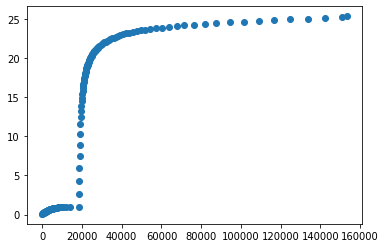

In [31]:
plt.scatter(df2.Delta_sec,df2['Mass (g)'])
plt.show()